In [13]:
import pandas as pd
df = pd.read_csv('email.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [14]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from matplotlib import pyplot as plt

In [57]:
#cleaning everything needed before testing and training
df.dropna(subset=["Category", "Message"], inplace=True)

In [58]:
X = df[["Message"]]
#instantly mapping y into numerical value in order to avoid any mistake
y = df["Category"].map({'ham': 0, 'spam': 1})

In [59]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [60]:
X

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [61]:
#further checking of y on including naN values
df = df[~y.isnull()]
y = y.dropna() 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#using vectorizer for every text message to make them numerical values
cv = CountVectorizer()
X_train_counts = cv.fit_transform(X_train["Message"]).toarray()
X_test_counts = cv.transform(X_test["Message"]).toarray()

In [69]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)

acc = accuracy_score(y_test, y_pred)
print(acc)

report = classification_report(y_test, y_pred)
print(report)

0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.98      0.88      0.92       160

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



[[952   3]
 [ 20 140]]


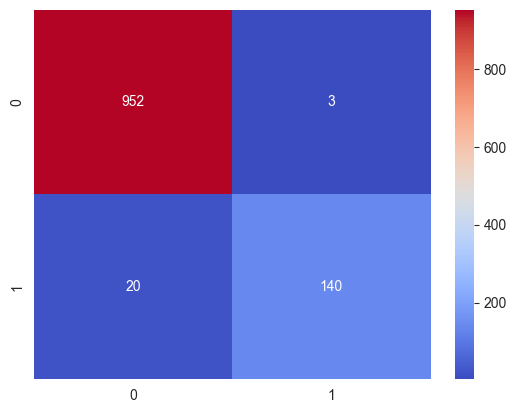

In [76]:
confusing = confusion_matrix(y_test, y_pred)
sns.heatmap(confusing, annot=True, cmap="coolwarm", fmt='d')
print(confusing)

In [78]:
y_pred_proba = model.predict_proba(X_test_counts)[:,1]
print(y_pred_proba.shape)

(1115,)


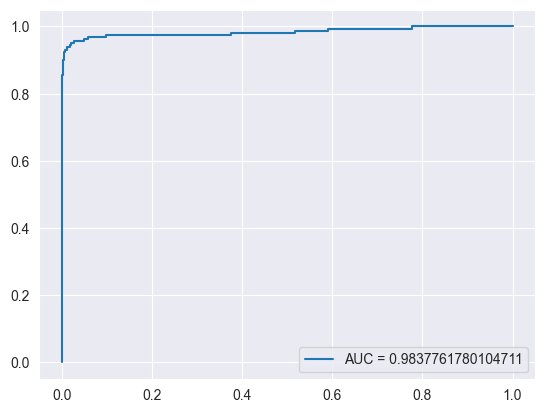

In [82]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {str(auc)}")
plt.legend(loc="lower right")
plt.show()